Disclaimer: I had trouble to find a rationale for choosin a given training set size in question1 and spent quite a lot of time playing a bit with the data and trying to figure out a logic for how to find the optimal training set size. Because of that, I ended up not having enough time to complete question3.

In [2]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import train_test_split
import matplotlib.patches as mpatches
from sklearn.model_selection import cross_val_score
from sklearn.utils import check_random_state



In [3]:
#I had trouble using plot_surface as a module so I temporarily just pasted it as a quick fix
def plot_surface(clf, X, y, n_steps=250, subplot=None, show=True,
                 ylim=None, xlim=None):
    if subplot is None:
        fig = plt.figure()
    else:
        plt.subplot(*subplot)

    if xlim is None:
        xlim = X[:, 0].min(), X[:, 0].max()
    if ylim is None:
        ylim = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], n_steps),
                         np.linspace(ylim[0], ylim[1], n_steps))

    if hasattr(clf, "decision_function"):
        z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z, alpha=0.8, cmap=plt.cm.RdBu_r)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlim(*xlim)
    plt.ylim(*ylim)

    if show:
        plt.show()

QUESTION 1

In [4]:
#Create data
X,y=make_blobs(n_samples=400, centers=23, random_state=42)
labels=['b', 'r']
#assign r if y<10
y=np.take(labels,(y<10))

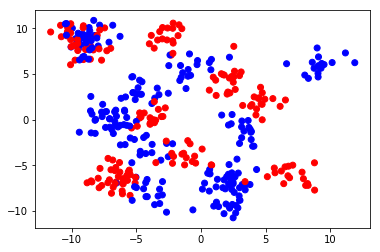

balance of dataset 0.4475


In [5]:
#Plot data
plt.scatter(X[:,0], X[:,1], color=y)
plt.show()
print 'balance of dataset '+str(float(len(y[y=='r']))/len(y))

We split the data into a training set including 80% of the whole dataset. The rationale behind this is that the smaller the training set that we choose, the more the model will depend on the particular data points in the training set and the easier we will be in the overfitting regime (Q: When we talk about the flexibility of a model, it's relative to the size of the dataset as well right?). However, the test set needs to be large enough to cover points in the data that are more or less in every region of the whole space of points. We chose 80% in particular because it roughly seemed like a good tradeoff between training and testing set sizes. To be honest, we inspired from the cross-validation shown in the slides where the splitting is of 80% as well. 
I did a bit of playing around with training/test set sizes further down in the notebook

Optimal k: 14
training score: 0.903125
test score: 0.85


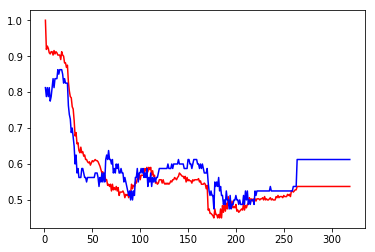

In [7]:
#Split data into a training set including 80% of the entire dataset. The rationale behind this choice is that choosing a training data
X_train, X_test, y_train, y_test=train_test_split(X,y, train_size=0.8)
#ks=np.arange(1,len(X_train))
ks=np.arange(1,len(X_train))

train_scores=[]
test_scores=[]
for k in ks:
    classifier=knn(n_neighbors=k)
    classifier.fit(X_train, y_train)
    train_scores.append(classifier.score(X_train, y_train))
    test_scores.append(classifier.score(X_test, y_test))
    
#Best choice of k
#best_k=ks[test_scores.index(np.max(test_scores))]
best_k=ks[np.argmax(test_scores)]
print 'Optimal k: '+str(best_k)
print 'training score: '+str(train_scores[best_k])
print 'test score: '+str(test_scores[best_k])


trains=plt.plot(ks, train_scores, color='red')
tests=plt.plot(ks, test_scores, color='blue')
#plt.legend(handles=([trains, tests],['Train','test']))
plt.show()

We can see an illuStration of the bias variance tradeoff. When we use a low value of k, we are overfitting and the training score is close to 1. If we were to repeat this, we would find that at low k, for any given point, we would have a high variance in our prediction and a low bias. At high k, we are essentially underfitting and because k is large, the prediction would come close to the value (red or blue) that comes up the most in the dataset.

Somewhere in between (in this instance at k=14), we have the optimal k value that maximises the test score (for this particular realisation of the training and data sets). For lower k, our model is too complicated and overfits. We hence have a low bias and high variance. For higher k, our model is too simple and has a high bias (yet low variance). In general, lower k means higher flexibility and complexity, and higher k means lower flexibility and complexity in the model.

We are now looking at different splits for the data. Spoiler alert, I got a bit carried away here, as there are things that I am not quite clear with and I was experimenting with.

In [11]:
#Here, we extract training and test scores for k values between 1 and 40. We also extract value of k maximising the test score and
#the associated training and test scores.
#We repeat this for training set sizes of 10% to 90%

ks=np.arange(1,41,1)
#complexity=[]
best_k=[]
bestk_test_score=[]
bestk_train_score=[]
#Lists where each element is a list of the test/training scores obtained for each value of k
test_scores_all=[]
train_scores_all=[]
sizes=np.arange(0.1,1.0, 0.1)

for train_size in sizes:
    #Splitting of the data into training and test sets of proportions specified by the sizes array.
    X_train, X_test, y_train, y_test=train_test_split(X,y, train_size=train_size)
    test_scores=[]
    train_scores=[]
    #We extract the training and test scores for each value of k
    for k in ks:
        #complexity.append(1./k)
        classifier=knn(n_neighbors=k)
        classifier.fit(X_train, y_train)
        train_scores.append(classifier.score(X_train, y_train))
        test_scores.append(classifier.score(X_test, y_test))
    #We append the value of k that maximises the test score, as well as the associated test and training scores
    best_k.append(ks[np.argmax(test_scores)])
    bestk_train_score.append(train_scores[np.argmax(test_scores)])
    bestk_test_score.append(np.max(test_scores))
    train_scores_all.append(train_scores)
    test_scores_all.append(test_scores)

    #trainscores=plt.plot(ks, train_scores, 'green', label='training')
    #testscores=plt.plot(ks, test_scores, 'orange', label='test')
    #plt.legend(handles=[trainscores, testscores])
    #plt.show()


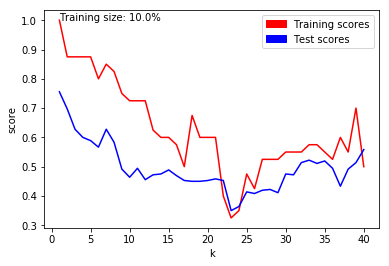

max test score: 0.755555555556


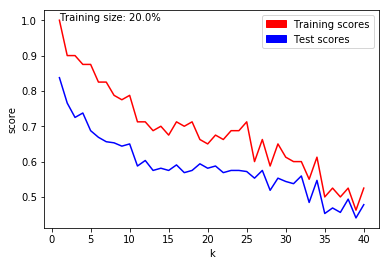

max test score: 0.8375


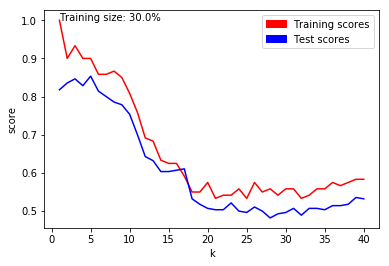

max test score: 0.853571428571


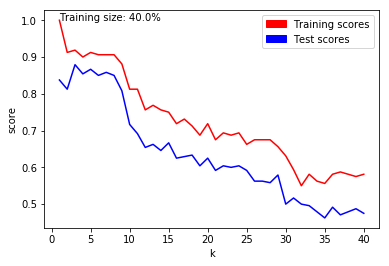

max test score: 0.879166666667


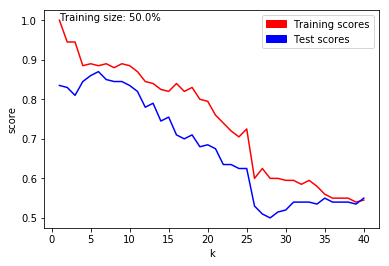

max test score: 0.87


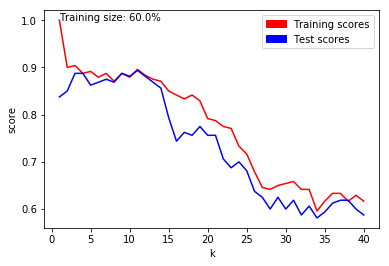

max test score: 0.89375


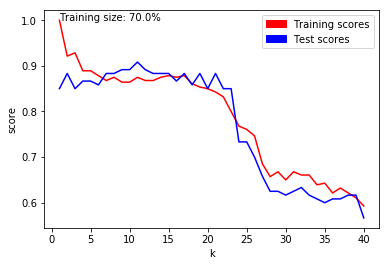

max test score: 0.908333333333


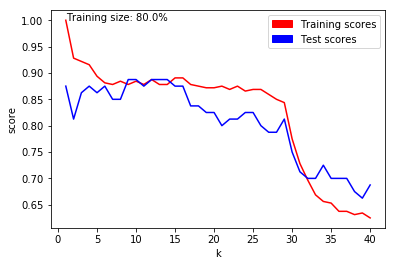

max test score: 0.8875


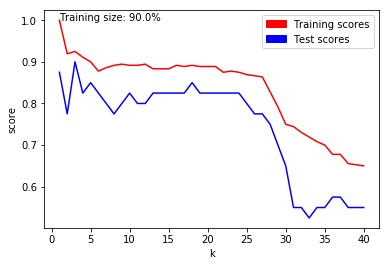

max test score: 0.9


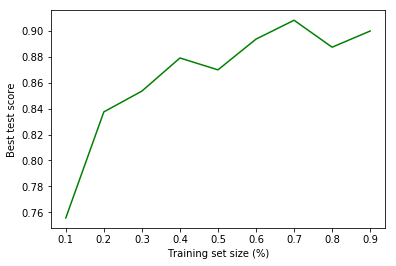

In [12]:
#For each training set size, we plot the training and test scores obtained as a function of k
maxscores=[]
for i in range(len(sizes)):
    fig=plt.figure()
    trains=plt.plot(ks, train_scores_all[i], color='r', label='Training scores')
    tests=plt.plot(ks, test_scores_all[i], color='b', label='Test scores')
    
    plt.xlabel('k')
    plt.ylabel('score')
    plt.text(1,1,'Training size: '+str(100*sizes[i])+str('%'))
    redpatch=mpatches.Patch(color='r', label='Training scores')
    bluepatch=mpatches.Patch(color='b', label='Test scores')
    plt.legend(handles=[redpatch, bluepatch])
    plt.show()

    maxscores.append(np.max(test_scores_all[i]))
    print 'max test score: '+str(np.max(test_scores_all[i]))
    
#Plot of the maximum score as a function of the training set size to see if there is a maximum
plt.plot(sizes, maxscores, 'g')
plt.xlabel('Training set size (%)')
plt.ylabel('Best test score')
plt.show()

We first look at the plots showing the training and test scores as a function of k for different training set sizes. Because KNN is essentially approximating the vicinity of test points with a constant, having few points in the training set means that our model consists of large plateaus. This should mean that we should have a high bias in the test data. But because we use few points, we should in principle also have a high variance. Therefore, for small training set sizes, the test scores should in general be lower than for larger training set sizes (except at very low k where we will always have a training score of 1). When varying k, the test score should be higher for values of k that are closer to 1 because it is for low k that we have the highest "resolution" with our model.

When we use a larger training set, the plateaus that we get are in principle smaller and our model resolution increases. We should therefore have higher test scores and the drop in training score should be slower as k is increased. Because we overfit when using low k, the maximum in the test score should shift towards higher k and the "true" optimal k.

However, when using a very large proportion of the dataset of the training, we get into a regime where the test data points are few and far between and the chances that we have test points that are not in clusters of training points are low. This should mean that using the test score for evaluating our model performance becomes less relevant. However, I fail to see how we should determine the optimal trianing set size. In principle, the test scores should increase with test sample size, which is what we see in the last graph, so we can't use that as a test. Maybe there are other test metrics that we can use?

One other comment is that here, for each training set size, we only test one realisation of the training data. This means that the plots that we have here don't take into account the variability in the test scores when doing the same analysis with different realisations of each test set (same number of points in the training set but a different set of them). If we were to extract the value of k that maximises the test score, as a function of the training set size multiple times, we would not get the same apparent optimum training set size. 


Because the values we get for the optimal k change depending on the choice of training data (for the same training data size), I would like to take a quick look at how the average and standard deviation of the test score behave when we perform multiple evaluations of the optimal k and corresponding test and training scores for the same splitting size ratios. I then do this test for various splitting size ratios and plot the mean and standard deviation of k, training scores and test scores as a function of the ratio of training data

In [14]:
#Function that gets the "optimal" k and its associated training and test scores for multiple realisations of a training set of a given size
def repeated_test(X,y, train_size, num_loops, ks):


    best_train_score=[]
    best_test_score=[]
    best_k=[]
#Split data into a training set including 80% of the entire dataset. The rationale behind this choice is that choosing a training data
    for i in range(num_loops):
        X_train, X_test, y_train, y_test=train_test_split(X,y, train_size=train_size)

        train_scores=[]
        test_scores=[]
        for k in ks:
            classifier=knn(n_neighbors=k)
            classifier.fit(X_train, y_train)
            train_scores.append(classifier.score(X_train, y_train))
            test_scores.append(classifier.score(X_test, y_test))

        #Best choice of k (maximise test score) and its corresponding training and test scores
        best_k_pos=test_scores.index(np.max(test_scores))
        best_k.append(ks[best_k_pos])
        best_train_score.append(train_scores[best_k_pos])
        best_test_score.append(test_scores[best_k_pos])

    return best_k, best_train_score, best_test_score



In [15]:
#Generate multiple optimal k values and associated training and test scores for each training set size
#This takes some time to run :-D
meank=[]
stdk=[]
meantrain=[]
stdtrain=[]
meantest=[]
stdtest=[]
sizes=np.arange(0.1, 1.1, 0.2)
for i in range(len(sizes)):
    k, train, test=repeated_test(X,y, sizes[i], 100,np.arange(1,41))

    meank.append(np.mean(k))
    stdk.append(np.std(k))
    meantrain.append(np.mean(train))
    stdtrain.append(np.std(train))
    meantest.append(np.mean(test))
    stdtest.append(np.std(test))


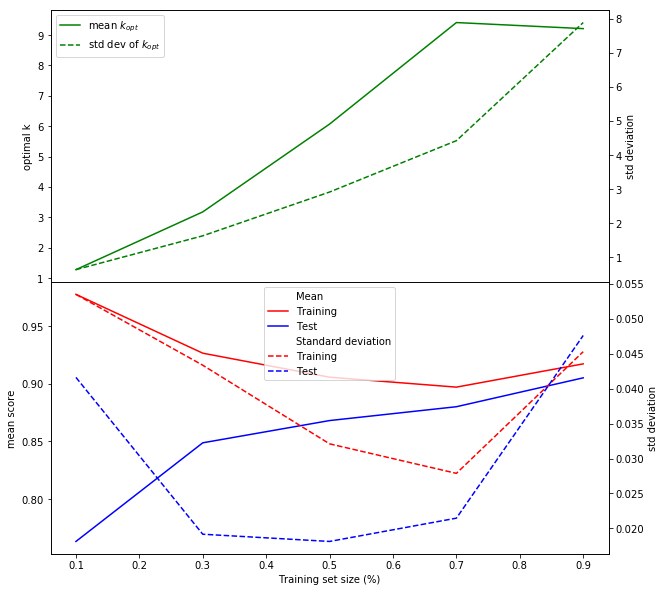

In [17]:
#PLot the results. 1st plot shows the average of the optimal k for each training set size and its standard deviation. 
#PLot 2 shows the average training and test scores associated with the optimal k value, as well as their standard deviations 
plt.figure(figsize=(10,10))

ax1=plt.subplot(211)
mean_k,=ax1.plot(sizes, meank, color='g', label='mean $k_{opt}$')
plt.ylabel('optimal k')

ax2=ax1.twinx()
std_k,=ax2.plot(sizes, stdk, 'g--', label='std dev of $k_{opt}$')
plt.ylabel('std deviation')
plt.legend(handles=[mean_k, std_k])

ax3=plt.subplot(212, sharex=ax1)
plt.xlabel('Training set size (%)')
mean_train,=ax3.plot(sizes, meantrain, color='r', label='Training')
mean_test,=ax3.plot(sizes, meantest, color='b', label='Test')
plt.ylabel('mean score')

ax4=ax3.twinx()
std_train,=ax4.plot(sizes, stdtrain,'r--', label='Training')
std_test,=ax4.plot(sizes, stdtest, 'b--', label='Test')
meanleg,=ax4.plot([], [], ' ', label="Mean")
stdleg,=ax4.plot([], [], ' ', label="Standard deviation")
plt.ylabel('std deviation')
plt.legend(handles=[meanleg, mean_train, mean_test, stdleg, std_train, std_test])
plt.subplots_adjust(hspace=0)

plt.show()


It looks like the average test score goes up monotonically while the training score has a dip at 0.5. The test score is systematically lower than the training score, which is as expected since the model is built on the training data. It looks like the variability in the optimal k value is at a minimum for a training set size of 50%. I guess this is because for low training sizes, we introduce variability within the model because we have few points on which to train it and at high test sizes, we have variability because we have few test points. 
Maybe we should use that splitting in which the combined standard deviations for the training and test scores is the lowest? This would mean that we have a low amount of variability in the model and in the test data, suggesting that there is enough training data for a good model with enough leftover test data to reliably estimate the performance of the model. Here, this points corresponds to a 50/50 splitting. I guess that this has also something to do with the balance in our data (Our data has 47% reds and is therefore quite balanced)


Last minute update: I realised that the way I was doing things previously, i.e to look at the optimal k value for each training sample size is not the optimal thing to do because I add one degree of freedom (which value of k is optimal). Instead I should try to fix k and then sweep over the training set sizes, which is what I do in the next cell

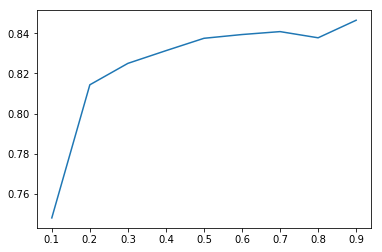

k= 1
optimal training set size: 0.9


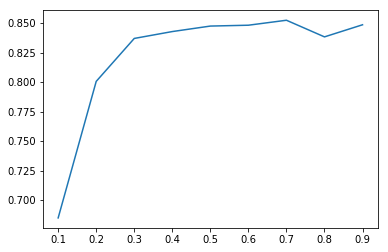

k= 3
optimal training set size: 0.7


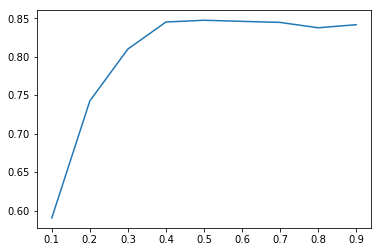

k= 5
optimal training set size: 0.5


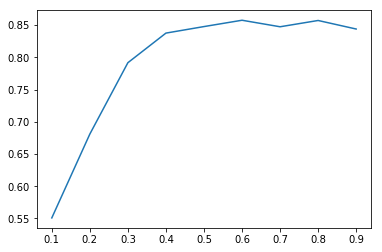

k= 7
optimal training set size: 0.6


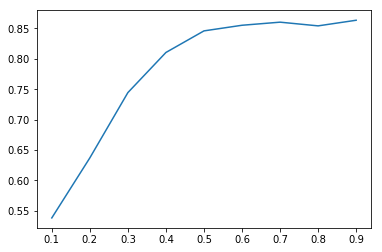

k= 9
optimal training set size: 0.9


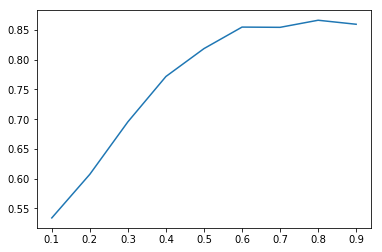

k= 11
optimal training set size: 0.8


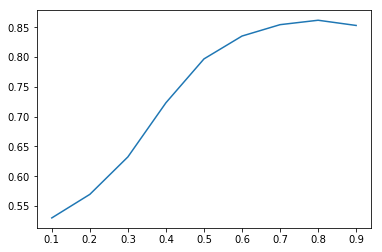

k= 13
optimal training set size: 0.8


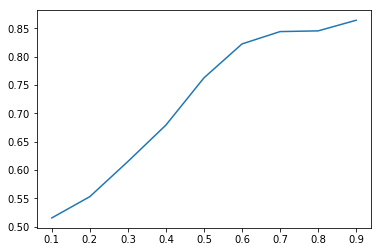

k= 15
optimal training set size: 0.9


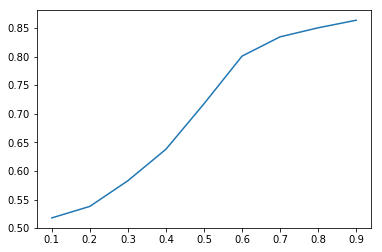

k= 17
optimal training set size: 0.9


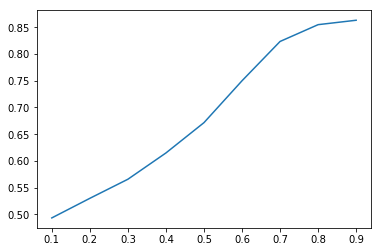

k= 19
optimal training set size: 0.9


In [27]:
ks=np.arange(1,21,2)
for k in ks:
    train_scores=[]
    test_scores=[]
    sizes=np.arange(0.1,1.0,0.1)
    for size in sizes:
        tmp_test_scores=[]
        tmp_train_scores=[]
        for i in range(50):
            X_train, X_test, y_train, y_test=train_test_split(X,y, train_size=size)
            classifier=knn(n_neighbors=k)
            classifier.fit(X_train, y_train)
            tmp_train_scores.append(classifier.score(X_train, y_train))
            tmp_test_scores.append(classifier.score(X_test, y_test))
        train_scores.append(np.mean(tmp_train_scores))
        test_scores.append(np.mean(tmp_test_scores))

    plt.plot(sizes, test_scores)
    plt.show()
    print 'k= '+str(k)
    print 'optimal training set size: '+str(sizes[np.argmax(test_scores)])

It looks like the optimal size is actually 0.9 but I'm still not sure if this is not too large because then we have a small test dataset and can't be sure that we're testing values that are not withing clusters of values from the training set. Therefore I try to keep the training set at 50% 

In [28]:
#We do 20 realisations of a training set of 50% of the whole dataset and plot the average best test score as a function of k
k, train, test=repeated_test(X,y, 0.5, 100,np.arange(1,41))

meank=np.mean(k)
stdk=np.std(k)
meantrain=np.mean(train)
stdtrain=np.std(train)
meantest=np.mean(test)
stdtest=np.std(test)

In [29]:
print 'average optimal k: '+str(np.round(meank))+' +/- '+ str(np.round(stdk))
print 'average test score for optimal k: '+str(meantest)+' +/- '+ str(stdtest)


average optimal k: 6.0 +/- 3.0
average test score for optimal k: 0.865 +/- 0.0168671277934


With a split of 50%, we find an average optimal k of 6. However, this is still a very simple scheme where we only use training and test data and no validation data. We are doing some level of cross-validation as we are generating different realisations of the training data, taking the k that maximises the test score for each realisation and in the end, taking the average of this optimal k. However, we can use more complex cross-validation strategies as seen during the course

In [276]:
#help(cross_val_score)
#help(train_test_split)

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

# set of parameters we want to try
param_grid = {'n_neighbors':  np.arange(1, 41)}

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.857
best parameters: {'n_neighbors': 8}
test-set score: 0.860


This is the best setting because it maximises the cross validation score and it is more reliable than what we did because we use a validation set. We plot the fitted model for 6 and 8 neighbours to see if there are large differences (not really)

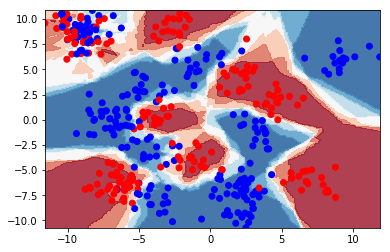

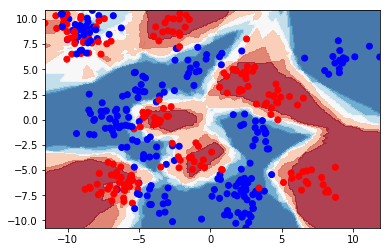

In [31]:
classifier1=KNeighborsClassifier(n_neighbors=6)
classifier1.fit(X,y)
classifier2=KNeighborsClassifier(n_neighbors=8)
classifier2.fit(X,y)

plot_surface(classifier1, X,y)
plt.show()

plot_surface(classifier2, X,y)
plt.show()

QUESTION 2

In [32]:
def make_regression(n_samples=100, noise_level=0.8, random_state=2):
    rng = check_random_state(random_state)
    X = np.linspace(-2, 2, n_samples)
    y = 2 * X + np.sin(5 * X) + rng.randn(n_samples) * noise_level
    
    return X.reshape(-1, 1), y

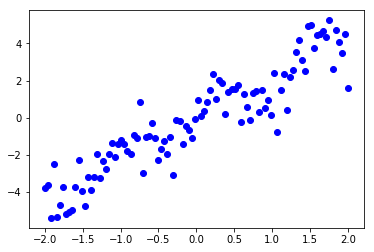

In [33]:
#Plot data
x,y=make_regression()
plt.scatter(x,y, color='blue')
plt.show()

In [34]:
#I can't plot x data as is because it is a list of lists --> Create an list xdat of all elements in x
xdat=[]
for i in range(len(x)):
    xdat.append(x[i][0])


In [35]:
#help(KNeighborsRegressor)

In [36]:
from sklearn.neighbors import KNeighborsRegressor as knr
from sklearn.metrics import mean_squared_error as MSE
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

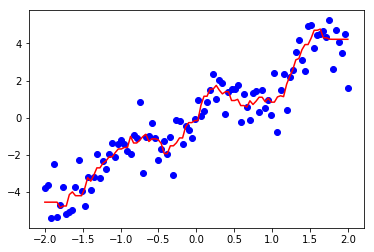

In [37]:
#Quick test to see if I can actually plot the fitted data
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

neigh=knr(n_neighbors=5)
T = np.linspace(-2, 2, 100)[:, np.newaxis]
neigh.fit(X_train,y_train)
yfit=[]
for i in x:
    yfit.append(neigh.predict(i))
plt.scatter(x,y, color='blue')
plt.plot(x,yfit, 'red')
plt.show()

k: 1


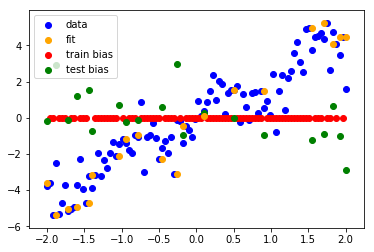

k: 2


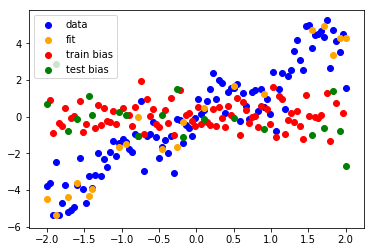

k: 3


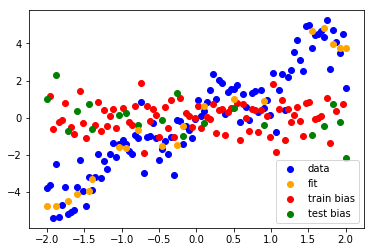

k: 4


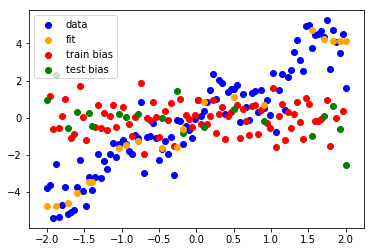

k: 5


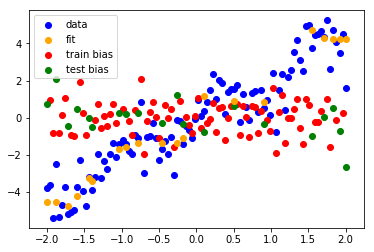

k: 6


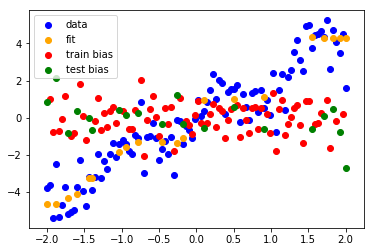

k: 7


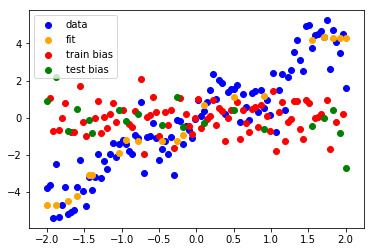

k: 8


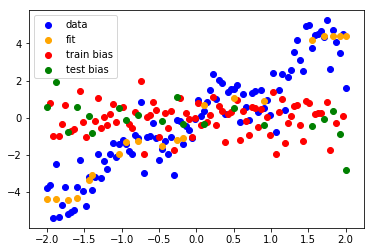

k: 9


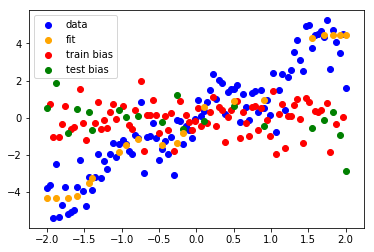

k: 10


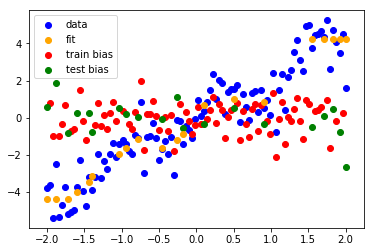

k: 11


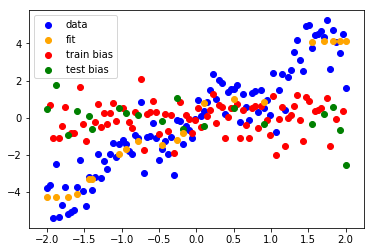

k: 12


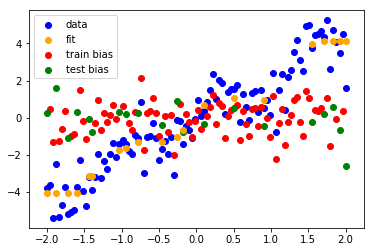

k: 13


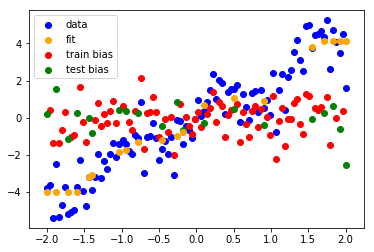

k: 14


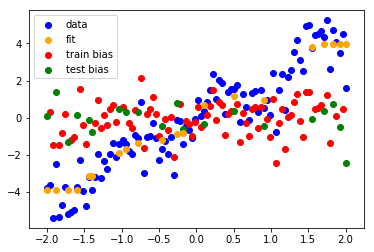

k: 15


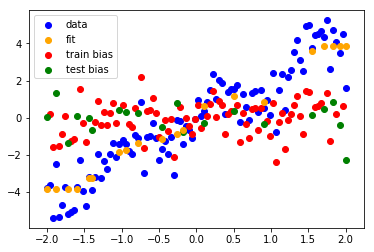

k: 16


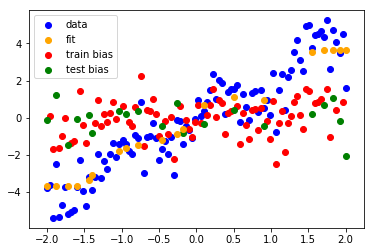

k: 17


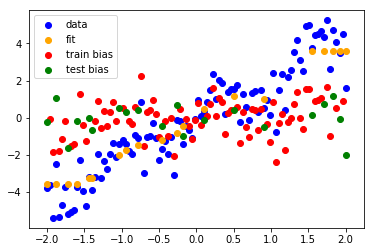

k: 18


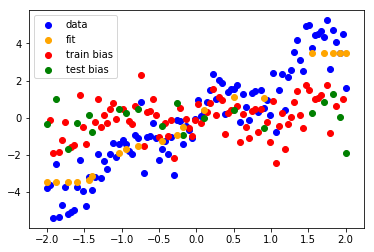

k: 19


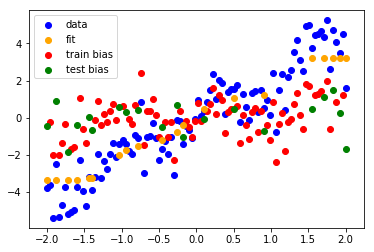

k: 20


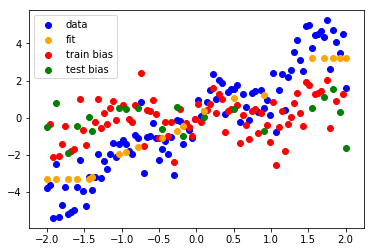

k: 21


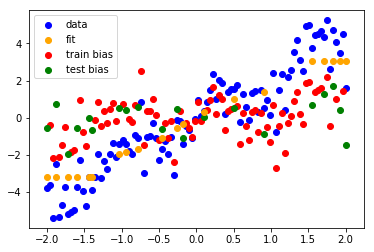

k: 22


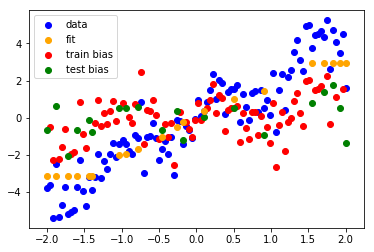

k: 23


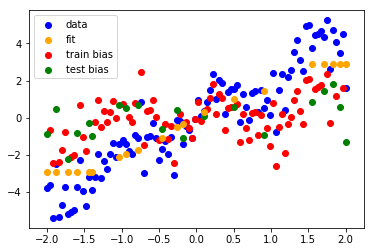

k: 24


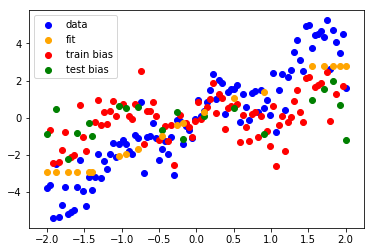

k: 25


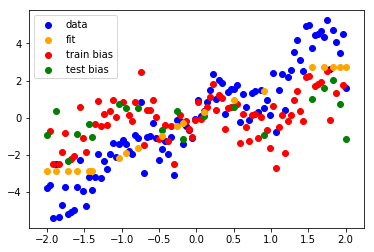

k: 26


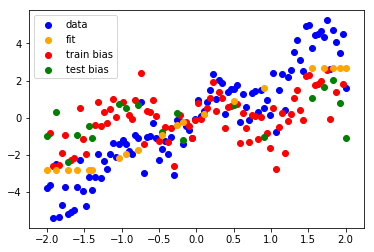

k: 27


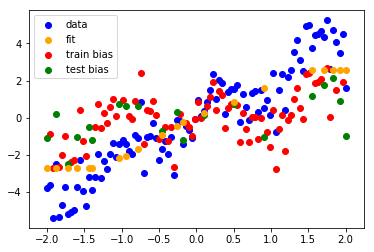

k: 28


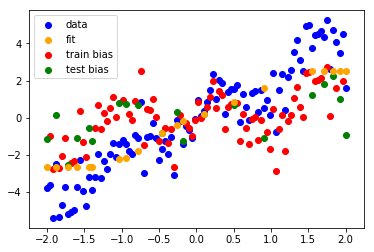

k: 29


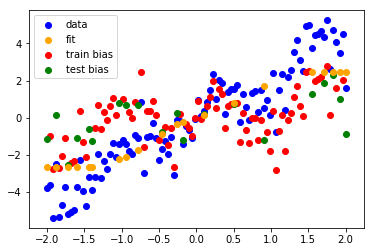

k: 30


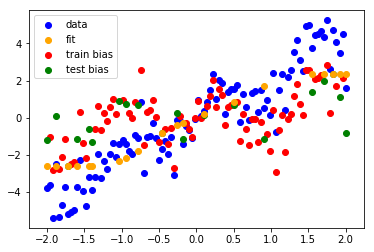

k: 31


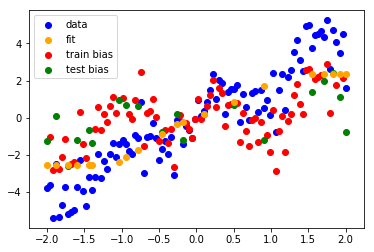

k: 32


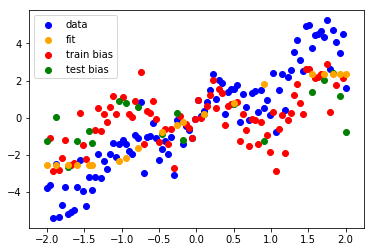

k: 33


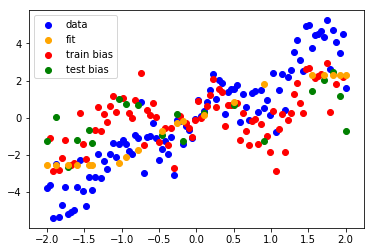

k: 34


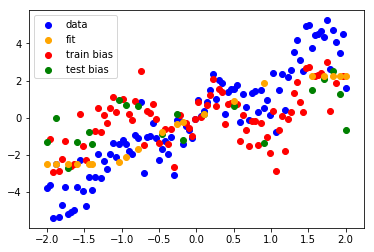

k: 35


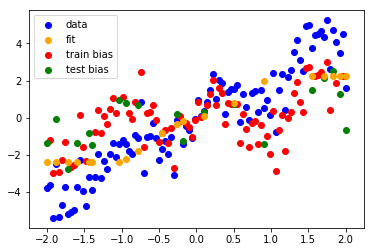

k: 36


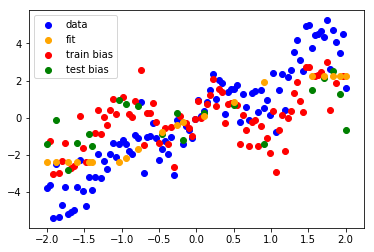

k: 37


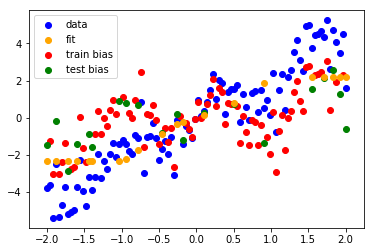

k: 38


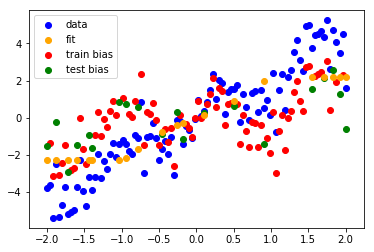

k: 39


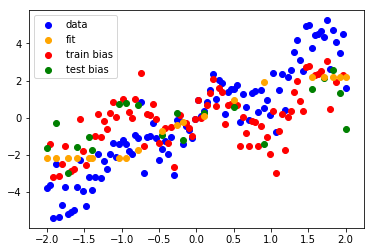

k: 40


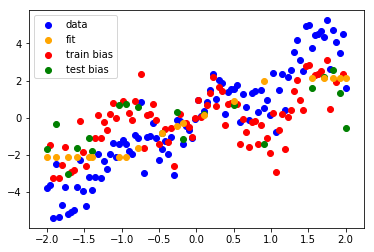

k: 41


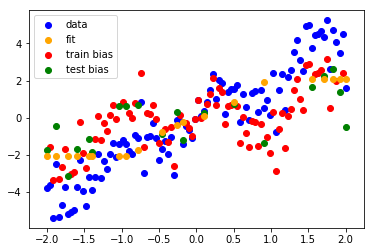

k: 42


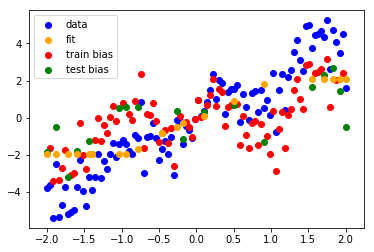

k: 43


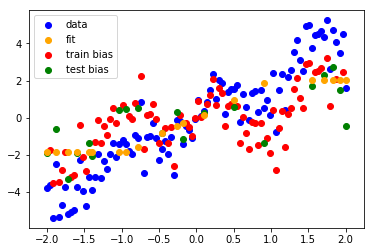

k: 44


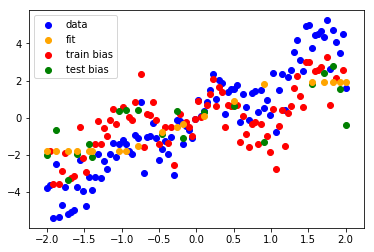

k: 45


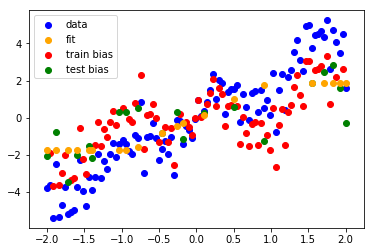

k: 46


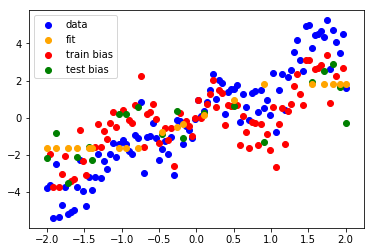

k: 47


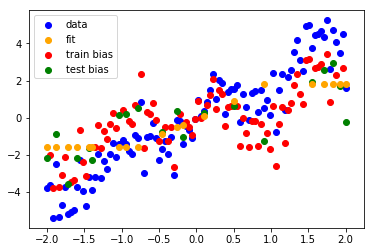

k: 48


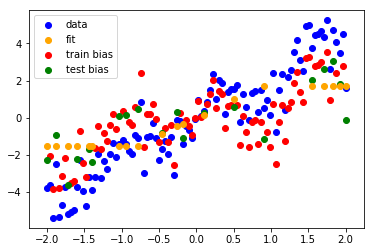

k: 49


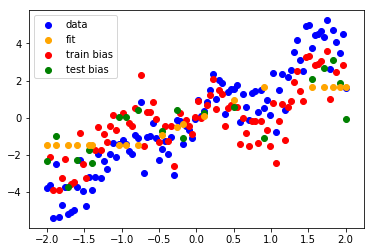

k: 50


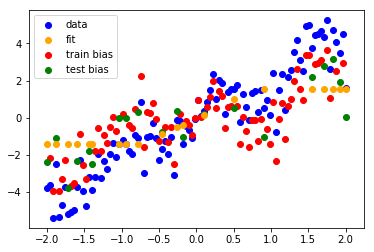

k: 51


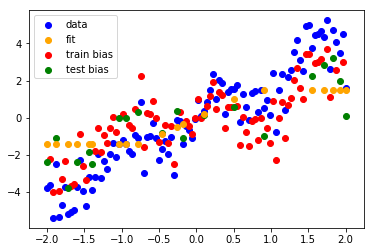

k: 52


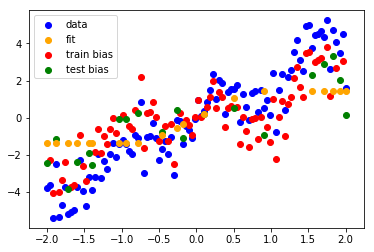

k: 53


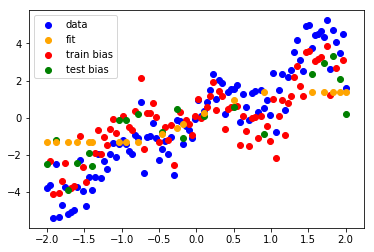

k: 54


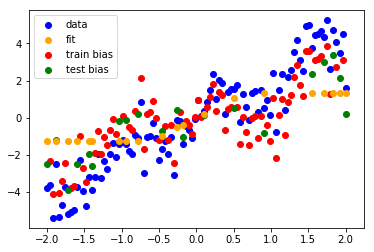

k: 55


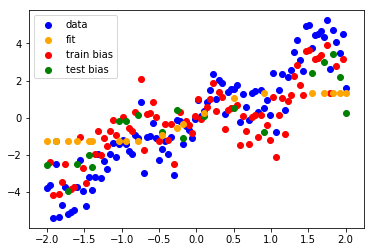

k: 56


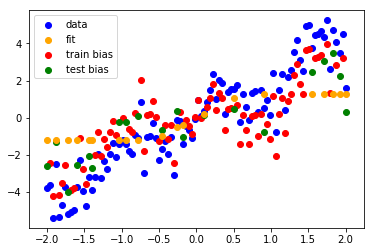

k: 57


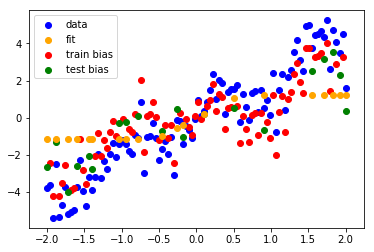

k: 58


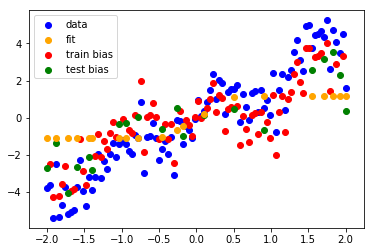

k: 59


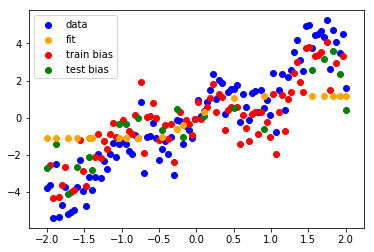

In [38]:
ks=np.arange(1,60)
mse_train=[]
mse_test=[]

for k in ks:
    neigh=knr(n_neighbors=k)
    neigh.fit(X_train,y_train)
    
    yfit_test=[]
    for i in X_test:
        yfit_test.append(neigh.predict(i))
    yfit_train=[]
    for i in X_train:
        yfit_train.append(neigh.predict(i))
    bias_test=[]
    for i in range(len(X_test)):
        bias_test.append(y_test[i]-yfit_test[i])

    bias_train=[]
    for i in range(len(X_train)):
        bias_train.append(y_train[i]-yfit_train[i])

    mse_test.append(MSE(y_test, yfit_test))
    mse_train.append(MSE(y_train,yfit_train ))

    print 'k: '+str(k)
    dat=plt.scatter(x,y, color='blue', label='data')
    train_bias=plt.scatter(X_train,bias_train, color='red', label='train bias')
    test_bias=plt.scatter(X_test, bias_test, color='green', label='test bias')
    fit=plt.scatter(X_test, yfit_test, color='orange', label='fit')
    plt.legend(handles=[dat, fit, train_bias, test_bias])
    plt.show()   

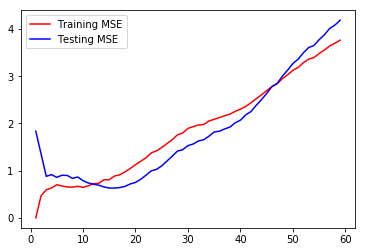

optimal k: 15


In [39]:
training_mse,=plt.plot(ks, mse_train, color='red', label='Training MSE')
testing_mse,=plt.plot(ks, mse_test, color='blue', label='Testing MSE')
plt.legend(handles=[training_mse, testing_mse])
plt.show()
print 'optimal k: '+str(np.argmin(mse_test))

We find that the optimal value for k is 8. Below that, our model is too complex and we are essentially overfitting. The model is too flexible and fits noise which explains the very low training MSE. This makes the model too sensitive to noise and thus leads to a higher test MSE. If we were to repeat this analysis, we would find that the data shows a high variance. At k>8, our model is too simple and we do not capture features of the data. Therefore, we have a high training and test MSEs. We have a high bias but because we are using a model that is stiff with respect to changes in the particular test set, the variance in the test data (upon repetition of this analysis) would be low. This is an illustration of the bias vs variance tradeoff.



Exercice 3

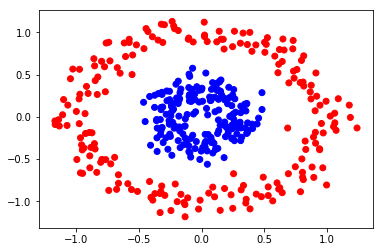

In [40]:

from sklearn.datasets import make_circles

X, y = make_circles(n_samples=400, factor=.3, noise=.1)
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [41]:
#I'm not sure that I understand what we are supposed to do but I understand it as building our own classifier? 
#If yes, we can use the circular symmetry of the data by using the norm of each data point and fitting a step function 
#but that's not really a classifier then :-D

#Binarise: blue=0, red=1
ybin=np.zeros_like(y)
ybin[y=='b']=0
ybin[y=='r']=1
X_train, X_test, y_train, y_test = train_test_split(X, ybin, train_size=0.8)

def norm(x1,x2):
    length=np.sqrt(x1**2+x2**2)
    return length

norms_train=[]
for x in X_train:
    norms_train.append(norm(x[0], x[1]))

norms_test=[]
for x in X_test:
    norms_test.append(norm(x[0], x[1]))


In [42]:
print len(norms_train), len(y_train)
print y_train

320 320
['0' '0' '1' '1' '0' '0' '0' '0' '1' '1' '1' '1' '0' '0' '1' '1' '1' '1'
 '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '1' '0' '1' '1' '1'
 '1' '1' '0' '1' '1' '0' '0' '0' '0' '1' '0' '0' '1' '1' '1' '0' '1' '1'
 '0' '0' '1' '0' '0' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '0' '0' '1'
 '0' '1' '0' '1' '0' '0' '0' '1' '1' '0' '0' '1' '1' '1' '1' '0' '1' '0'
 '0' '0' '1' '0' '0' '0' '0' '1' '1' '0' '1' '0' '0' '1' '1' '1' '0' '0'
 '1' '0' '1' '0' '0' '1' '0' '1' '0' '0' '0' '1' '1' '0' '1' '1' '0' '0'
 '0' '1' '0' '1' '1' '0' '0' '1' '1' '0' '0' '0' '1' '0' '0' '1' '1' '0'
 '0' '0' '1' '0' '0' '1' '1' '0' '1' '0' '0' '0' '0' '0' '1' '1' '0' '1'
 '0' '0' '1' '0' '1' '1' '0' '1' '1' '1' '1' '0' '1' '0' '1' '0' '0' '1'
 '0' '0' '1' '1' '0' '0' '1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1'
 '0' '1' '0' '0' '0' '1' '1' '1' '1' '1' '0' '0' '1' '0' '0' '1' '0' '1'
 '1' '0' '1' '1' '0' '0' '0' '0' '1' '1' '0' '1' '0' '0' '0' '1' '1' '0'
 '1' '0' '1' '1' '0' '0' '1' '0' '1' '1' '1

In [43]:
plt.scatter(norms, ybin)
plt.xlabel('distance from center of circles')
plt.ylabel('value (b=0, r=1)')
plt.show()

NameError: name 'norms' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression as lr

In [ ]:
reg=lr(C=1, dual=True)
reg.fit(X_train,y_train)
plot_surface(reg,X,y)

I've tried playing a bit with the parameters but I can't get something that seems correct and captures the symmetry of the problem. I unfortunately don't have the time to go further on that exercice. I tried to perform the logistic regression using the norms as x data but I couldn't get the code to work